
## Problem Description:
> 1. Solve the following LP using the simplex algorithm. Verify your solution using a solver of your choice. 
 


###  Max. $$z = 5x1 + x2$$ 

## s.t.    
$$2 \cdot x_1 + x_2 ≤ 6$$ 
$$x_1 - x_2 ≤ 0$$  
$$x_1, x_2    ≥  0$$  

# <span style="color:orange"><center><b>Module imports and data loading</b></center></span>

In [34]:
from _GUROBI_TOOLS_.GUROBI_MODEL_BUILDING_TOOLS import *
from _NOTE_BOOK_UTILS import *
import skimage

# for getting the images to show up in the pdf use matplotlib to display as output
# instead of the Markdown, since it is not guaranteed to work. 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

note_book_title = "_HW_6.ipynb"

# <a id=Data-Display><span style="color:Green"><center>Simplex Algorithm Solution</center></span></a>

In [33]:
# !pip install scikit-image

You should consider upgrading via the 'c:\users\gjone\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


[15435 13335]


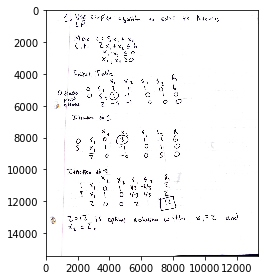

In [36]:
image_path = 'SimplexHandWork.jpg'
img = skimage.io.imread(image_path)

# get image data as a matrix
# img = mpimg.imread(image_path)

scale = 5        # how much we want to scale the data

# get scales dimension of the data
img_dim = np.array(img.shape[0:2]) * scale
print(img_dim)

resized_img = skimage.transform.resize(img,img_dim)
skimage.io.imshow(resized_img)

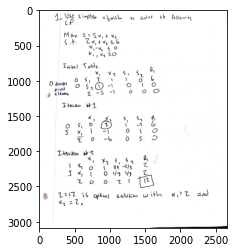

In [20]:
 
    
plt.imshow(resized_img )


# display data for problem
![Simplex-Image](SimplexHandWork.jpg)


<img title="Simplex-Image" alt="Simplex-Image" src="SimplexHandWork.jpg">

# <a id=implementation><center>Gurobi Implementation and Solution</center></a>

In [9]:
try:
    # instantiate model object 
    m = gp.Model("Simplex_Verification")
 
    #########################################################################################
    ################################## Variables set up #####################################
    #########################################################################################
    Xi = m.addVars(2, vtype=GRB.CONTINUOUS, name="X", lb=0)       # X1, X2 creation and >= 0
    Z = m.addVar(vtype=GRB.CONTINUOUS, name="Z", lb=0)            # objective
    
     
    #########################################################################################
    ################################## Objective set up #####################################
    #########################################################################################    
    m.setObjective(Z, GRB.MAXIMIZE)
    
    #########################################################################################
    ################################## Constraint set up ####################################
    #########################################################################################
    m.addConstr(Z == 5*Xi[0] + Xi[1])                            # Optimization Expression
    m.addConstr(2*Xi[0] + Xi[1] <= 6)
    m.addConstr(Xi[0] - Xi[1] <= 0)
   
    
    #########################################################################################
    ################################## SOLVE:OPTIMIZE #######################################
    #########################################################################################    
    
    
    m.optimize()
    
    #########################################################################################
    ################################## Display Results ######################################
    #########################################################################################    
    displayDecisionVars(m, end_sentinel="6")
    
    print("\n-------------Does it make sense?----------------------")  
    print('Obj: {:.2f}'.format(m.ObjVal))
    
    
# catch some math errors
except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 3 rows, 3 columns and 7 nonzeros
Model fingerprint: 0x88501388
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+00, 6e+00]
Presolve removed 3 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.200000000e+01
X[0] 2.00000
X[1] 2.00000
Z 12.00000
-------------------------------------



-------------Does it make sense?----------------------
Obj: 12.00


# <a id=solution><span style="color:crimson"><center>Solution Discussion</center></a>

> The solution produced by Gurobi Agrees with hour Simplex derives solution. Accroding to both **X1 and X2 should be 2** leading to an optimal value of **z = 12**. 

In [12]:
# save the notebook as a pdf
to_PDF(note_book_title)

filename: _HW_6.ipynb
